# 1. Compare delta CAI's for different window sizes


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab
    
#windows we ran in bash script
all_windows = [15,30,60,90,120,150,300,450,600,750,900,1050,1200, 1350,1500]
#dont want to graph all windows on x axis
graph = [15,150,300,450,600,750,900,1050,1200, 1350,1500]

stds = []   
all_vals = {} 
all_means = []
all_medians = []
sem = []
geneLens = []
geneIDS = {}   
all_cost_means = []

#get all stats for random sites
for w in all_windows:
    file = 'all/all_random_locs_window' + str(w)+'.tsv'
    with open(file, 'r') as f: 
        vals = []
        lens = []
        ids = []
        costs = []
        for line in f:
            if not line.startswith('#'):
                vals.append(float(line.strip().split('\t')[5]))
                lens.append(int(line.strip().split('\t')[2]))
                ids.append(line.strip().split('\t')[0])
                costs.append(float(line.strip().split('\t')[-1]))
            
        
        
        all_vals[w] = vals
        all_means.append(np.mean(vals))
        all_medians.append(np.median(vals))
        stds.append(np.std(vals))
        sem.append(np.std(vals) / np.sqrt(len(vals)))
        geneLens.append(np.mean(lens))
        geneIDS[w] = ids 
        all_cost_means.append(np.mean(costs) / w )
        

        



Text(0.5, 0, 'Window Size NT')

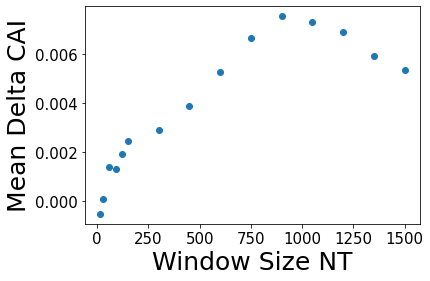

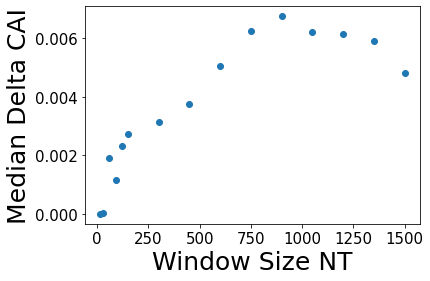

In [21]:
fig, ax = plt.subplots() 
plt.scatter(all_windows, all_means)
plt.ylabel('Mean Delta CAI')
plt.xlabel('Window Size NT')
#ax.errorbar(range(150,1051, 150), stds ,  xerr= 0 , yerr = stds, fmt='-o')


plt.figure()
plt.scatter(all_windows, all_medians)
plt.ylabel('Median Delta CAI')
plt.xlabel('Window Size NT')

In [22]:
#repeat above for PRF sites

#for prfs
prf_all_vals ={}
prf_all_means = []
prf_all_medians = []
prf_stds = [] 
prf_sem = []
prf_geneLens = []
prf_geneIDS = {}
prf_cost_means = []
for w in all_windows:
    file = 'all/all_prfdb_cai_window' +  str(w)+'.tsv'
    with open(file, 'r') as f: 
        vals = []
        lens = []
        ids = []
        costs = []
        for line in f:
            if not line.startswith('#'):
                vals.append(float(line.strip().split('\t')[5]))
                lens.append(int(line.strip().split('\t')[2]))
                ids.append(line.strip().split('\t')[0])
                costs.append(float(line.strip().split('\t')[-1]))
        
        prf_all_vals[w] = vals
        prf_all_means.append(np.mean(vals))
        prf_all_medians.append(np.median(vals))
        prf_stds.append(np.std(vals))
        prf_sem.append(np.std(vals) / np.sqrt(len(vals)))
        prf_geneLens.append(np.mean(lens))
        prf_geneIDS[w] = ids 
        prf_cost_means.append(np.mean(costs) / w)
        


Text(0.5, 0, 'Window Size NT')

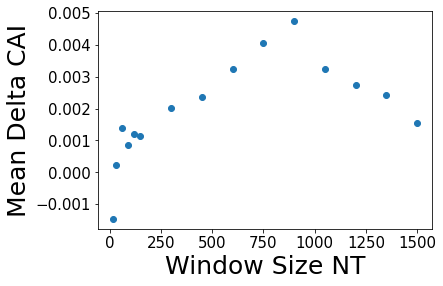

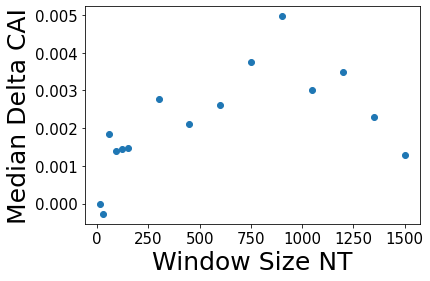

In [23]:
plt.figure()
plt.scatter(all_windows, prf_all_means)
plt.ylabel('Mean Delta CAI')
plt.xlabel('Window Size NT')

plt.figure()
plt.scatter(all_windows, prf_all_medians)
plt.ylabel('Median Delta CAI')
plt.xlabel('Window Size NT')


Text(0, 0.5, 'Average Gene Length in Dataset (NT)')

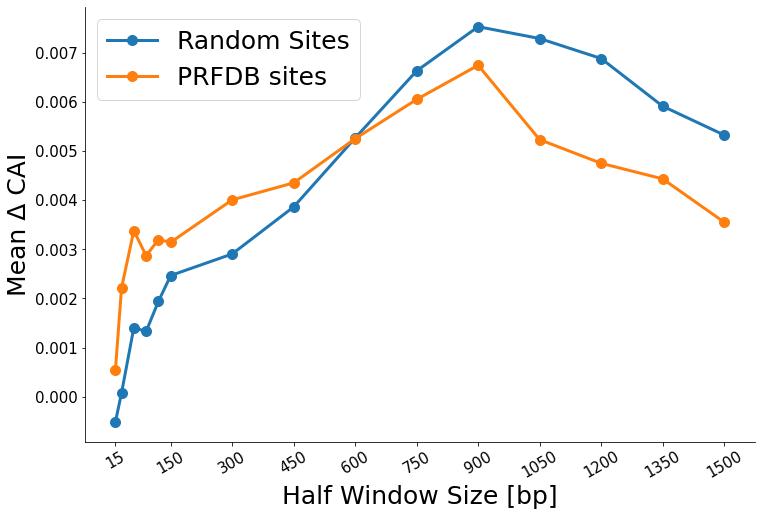

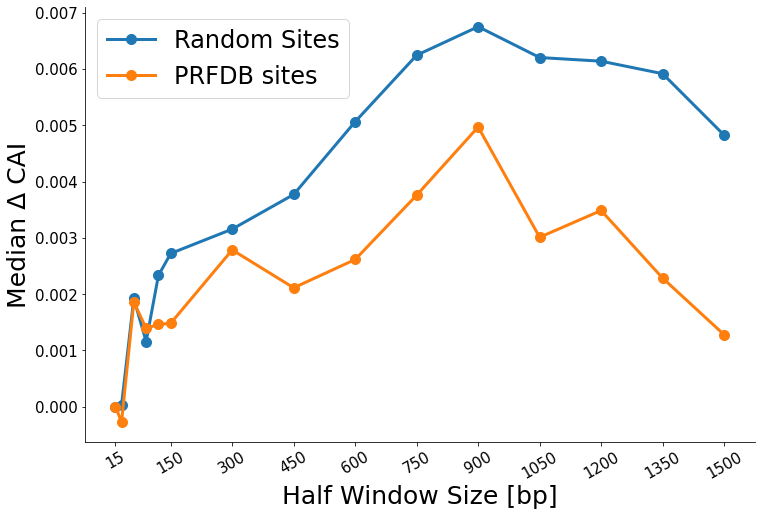

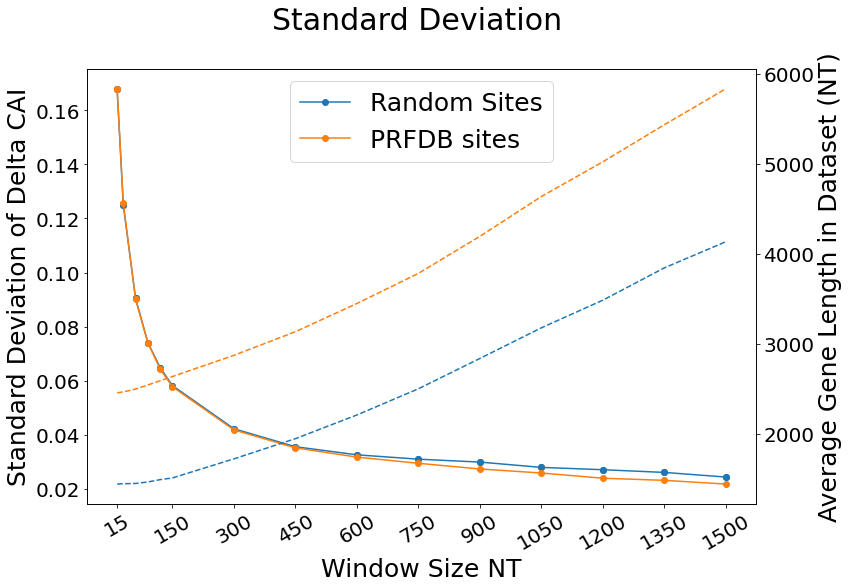

In [24]:
#relevant figure for CAIs!

prf_all_means = np.array(prf_all_means) + 0.002

fig, ax = plt.subplots(figsize = [12,8])
fig.figsize =  [12,8]
#plt.rcParams.update({'font.size': 15})
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
#plt.plot(all_windows, all_means)
plt.ylabel('Mean Δ CAI')
plt.xlabel('Half Window Size [bp]')
#plt.plot(all_windows, prf_all_means)

plt.plot(all_windows, all_means,marker='o', linewidth = 3, markersize = 10)
plt.plot(all_windows, prf_all_means,marker='o', linewidth = 3, markersize = 10)
plt.xticks(graph, rotation = 30)
plt.legend(['Random Sites', 'PRFDB sites'])




fig, ax = plt.subplots(figsize = [12,8])
fig.figsize =  [12,8]
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 24})
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
plt.plot(all_windows, all_medians,marker='o', linewidth = 3, markersize = 10)
plt.plot(all_windows, prf_all_medians,marker='o', linewidth = 3, markersize = 10)
plt.legend(['Random Sites', 'PRFDB sites'])
plt.ylabel('Median Δ CAI')
plt.xlabel('Half Window Size [bp]')
plt.xticks(graph, rotation = 30)





plt.rcParams.update({'font.size': 25})

fig, ax1 = plt.subplots(figsize = [12,8])

ax1.scatter(all_windows, stds)
ax1.plot(all_windows, stds, marker='o')
plt.ylabel('Standard Deviation of Delta CAI')
plt.xlabel('Window Size NT')

ax1.plot(all_windows, prf_stds,marker='o')
plt.legend(['Random Sites', 'PRFDB sites'], loc = 'upper center')
plt.title('Standard Deviation \n') 
plt.xticks(graph, rotation = 30)

ax2 = ax1.twinx()
ax2.plot(all_windows, geneLens,linestyle='dashed')

ax2.plot(all_windows, prf_geneLens,linestyle='dashed')
plt.ylabel('Average Gene Length in Dataset (NT)')





([<matplotlib.axis.XTick at 0x7fc4e29123a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

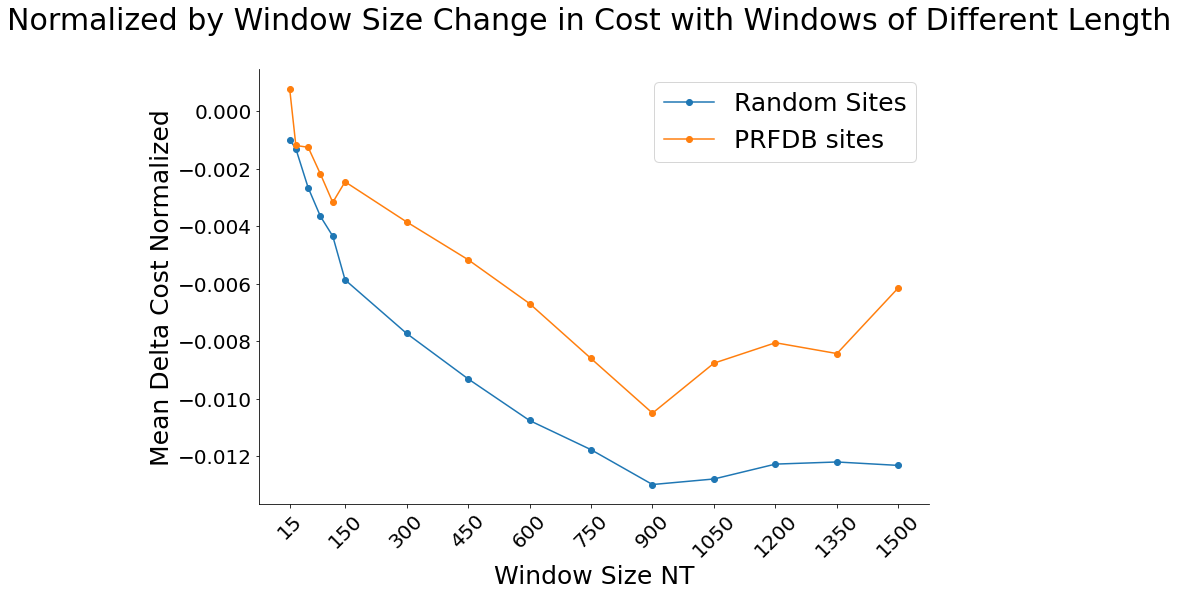

In [25]:
#costs

fig, ax = plt.subplots(figsize = [12,8])
fig.figsize =  [12,8]
#plt.rcParams.update({'font.size': 20})
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.plot(all_windows, all_cost_means, marker = 'o')
#plt.plot(all_windows, all_means)
plt.ylabel('Mean Delta Cost Normalized')
plt.xlabel('Window Size NT')
plt.plot(all_windows, prf_cost_means,marker = 'o')
#plt.plot(all_windows, prf_all_means)
plt.legend(['Random Sites', 'PRFDB sites'])
plt.title('Normalized by Window Size Change in Cost with Windows of Different Length \n') 
plt.xticks(graph, rotation = 45)


In [53]:
#can assume normal distributions - see below
#Zvals
def get_tscore(vals1, vals2):
    top = - np.mean(vals1) + np.mean(vals2) 
    bottom = np.sqrt(((np.std(vals1)/np.sqrt(len(vals1))) ** 2) + ((np.std(vals2)/np.sqrt(len(vals2))) ** 2))
    z = top/ bottom
    return z

for x in all_vals.keys(): 
    print('Window: ' +  str(x) + ' T Score: ' + str(get_tscore(all_vals[x], prf_all_vals[x])))
  



Window: 15 T Score: -0.26458733154945446
Window: 30 T Score: 0.6390525750279071
Window: 60 T Score: -0.17440969054587757
Window: 90 T Score: -1.3364569119902947
Window: 120 T Score: -1.6587313117328595
Window: 150 T Score: -2.713537366960578
Window: 300 T Score: -2.042797548167939
Window: 450 T Score: -3.359739849003526
Window: 600 T Score: -5.613046456389891
Window: 750 T Score: -5.970580395839266
Window: 900 T Score: -6.047603894880596
Window: 1050 T Score: -7.888529908076564
Window: 1200 T Score: -7.8960760826437975
Window: 1350 T Score: -6.092971767927795
Window: 1500 T Score: -5.540332399062159


# 2. look at CAI distribution for every window size

In [34]:
from scipy import stats

for w in all_windows:
    file = 'all/all_prfdb_cai_window' + str(w)+'.tsv'
    with open(file, 'r') as f: 
        vals = []
        for line in f:
            vals.append(float(line.strip().split('\t')[-1]))
  
        
        ks_val = stats.kstest(vals, 'norm' )
        print(w)
        print(ks_val)
    
    
       


15
KstestResult(statistic=0.27731612206815626, pvalue=0.0)
30
KstestResult(statistic=0.36144856648873736, pvalue=0.0)
60
KstestResult(statistic=0.40579845817832927, pvalue=0.0)
90
KstestResult(statistic=0.42348832734205777, pvalue=0.0)
120
KstestResult(statistic=0.4407130761449943, pvalue=0.0)
150
KstestResult(statistic=0.4424858684040436, pvalue=0.0)
300
KstestResult(statistic=0.4756251474122888, pvalue=0.0)
450
KstestResult(statistic=0.4914883692709614, pvalue=0.0)
600
KstestResult(statistic=0.5174471924460248, pvalue=0.0)
750
KstestResult(statistic=0.5276558867962191, pvalue=0.0)
900
KstestResult(statistic=0.548343004616816, pvalue=0.0)
1050
KstestResult(statistic=0.5365235670979708, pvalue=0.0)
1200
KstestResult(statistic=0.5423110756245856, pvalue=0.0)
1350
KstestResult(statistic=0.5432284118662326, pvalue=0.0)
1500
KstestResult(statistic=0.5303510424981354, pvalue=2.7171226574131898e-306)


KstestResult(statistic=0.4421163690446517, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


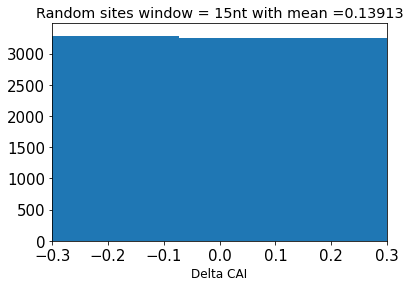

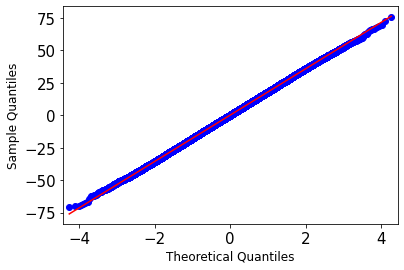

KstestResult(statistic=0.46040881197628125, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


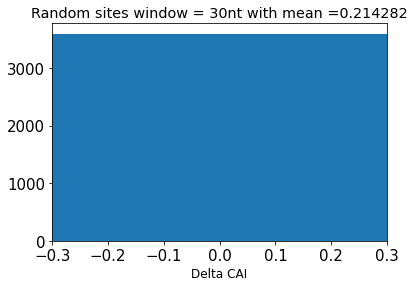

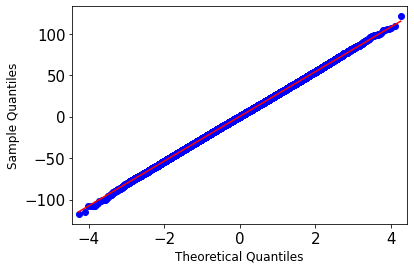

KstestResult(statistic=0.4780173990476002, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


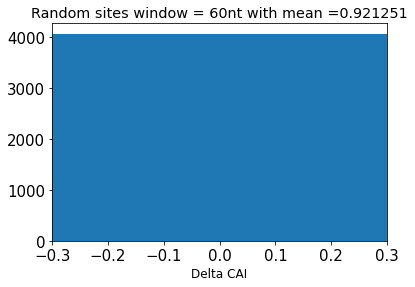

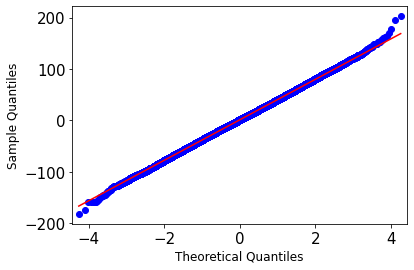

KstestResult(statistic=0.4883080407813496, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


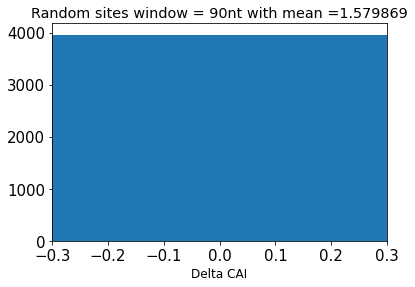

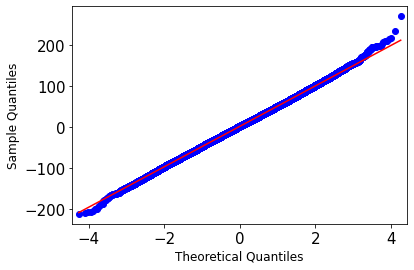

KstestResult(statistic=0.4989988175258107, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


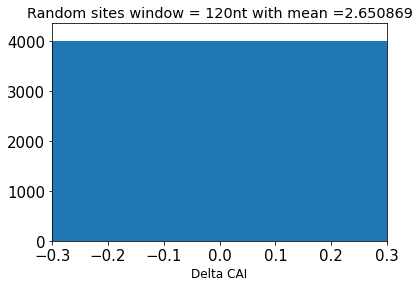

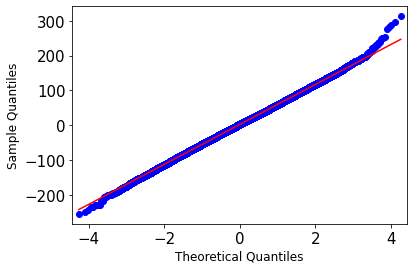

KstestResult(statistic=0.5048476410050603, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


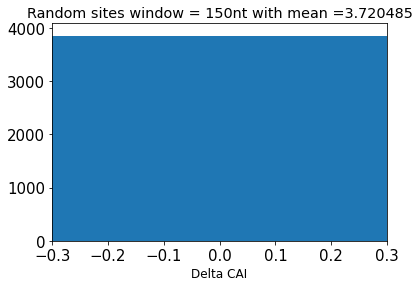

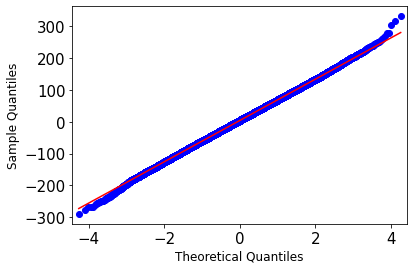

KstestResult(statistic=0.5209351127645079, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


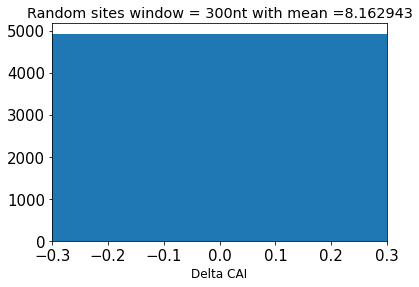

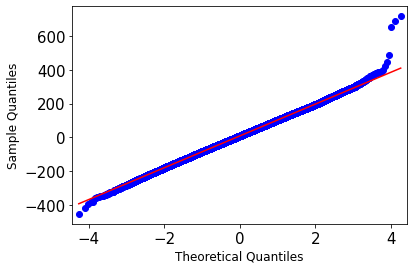

KstestResult(statistic=0.5311052608265414, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


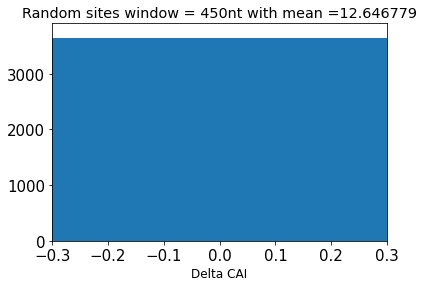

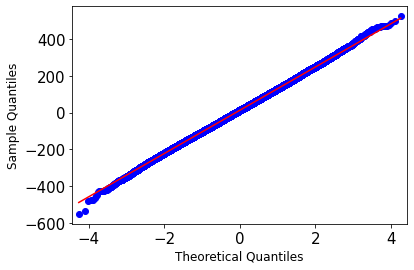

KstestResult(statistic=0.5374301019683698, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


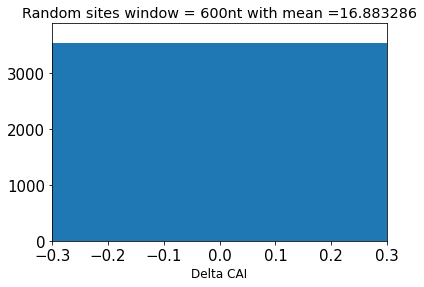

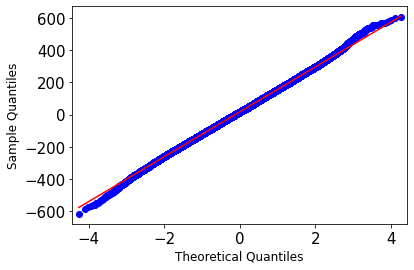

KstestResult(statistic=0.5409859684843684, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


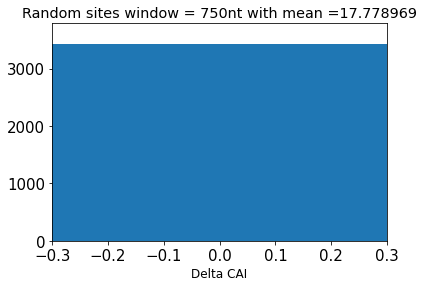

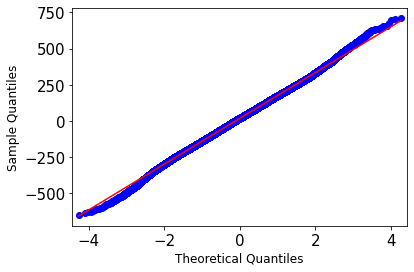

KstestResult(statistic=0.5435010489096133, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


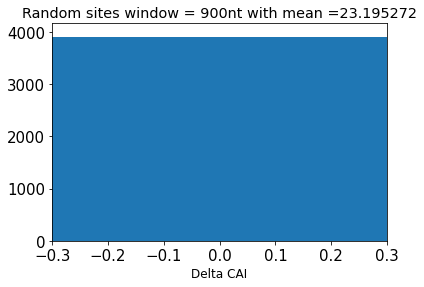

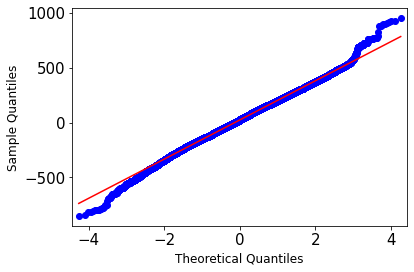

KstestResult(statistic=0.5445736476871714, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


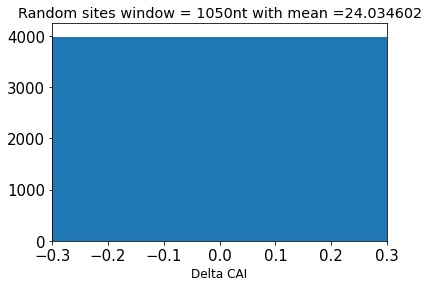

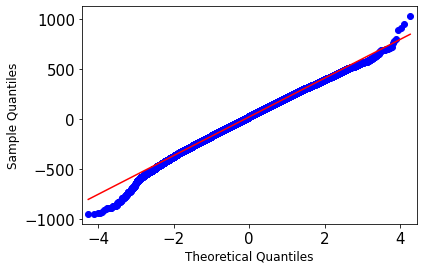

KstestResult(statistic=0.54725632513856, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


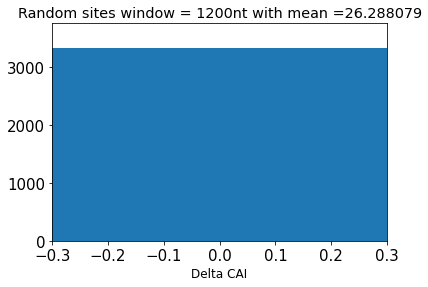

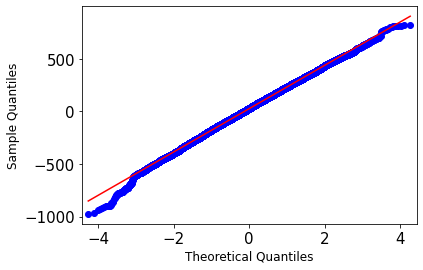

KstestResult(statistic=0.558400964566793, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


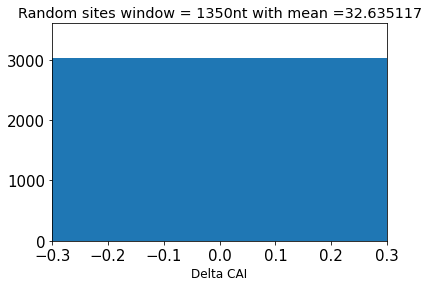

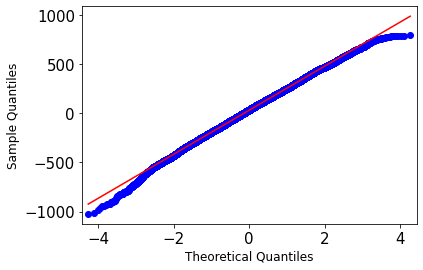

KstestResult(statistic=0.5585830707343231, pvalue=0.0)


/Users/jakob/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


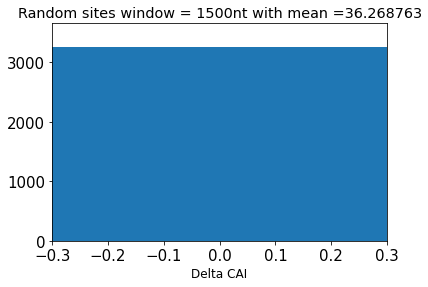

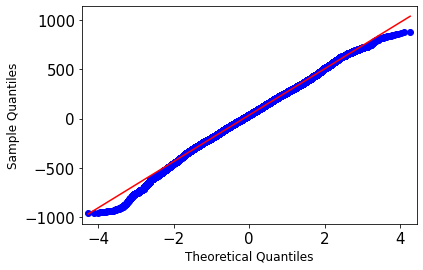

In [14]:
for w in all_windows:
    file = 'all/all_random_locs_window'+ str(w)+'.tsv'
    with open(file, 'r') as f: 
        vals = []
        for line in f:
            vals.append(float(line.strip().split('\t')[-1]))
        plt.figure()
        plt.title('Random sites window = ' + str(w) + 'nt with mean =' + str(round(np.mean(vals), 6)))
        plt.xlabel('Delta CAI')
        plt.hist(vals, bins= 100)
        plt.xlim([-0.3, 0.3]) 
        ks_val = stats.kstest(vals, 'norm' )
        print(ks_val)
        
        sm.qqplot(np.array(vals), line='r')
        pylab.show()
        


Todo: check from normalness with smirinoff test: 


# Investigate positional affect of delta CAI
normalize location of split by length of gene
Do I add in multiexon genes now? 
I think I should before i mess sum thang up but ask victor- also google alternatative splicing in yeast genes which im fairly certain is not a concern

/var/folders/7f/_vdp3w9j5r9_qyl5mkhz8pn00000gn/T/ipykernel_71757/2224560813.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize= [12,8])


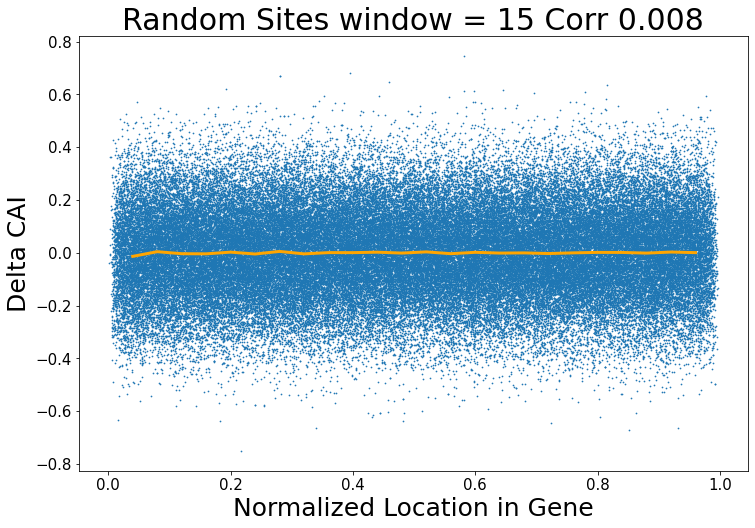

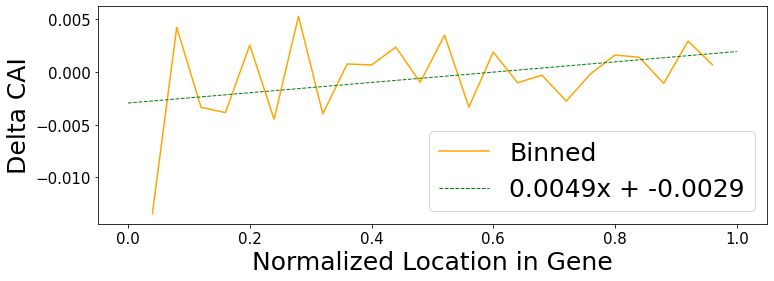

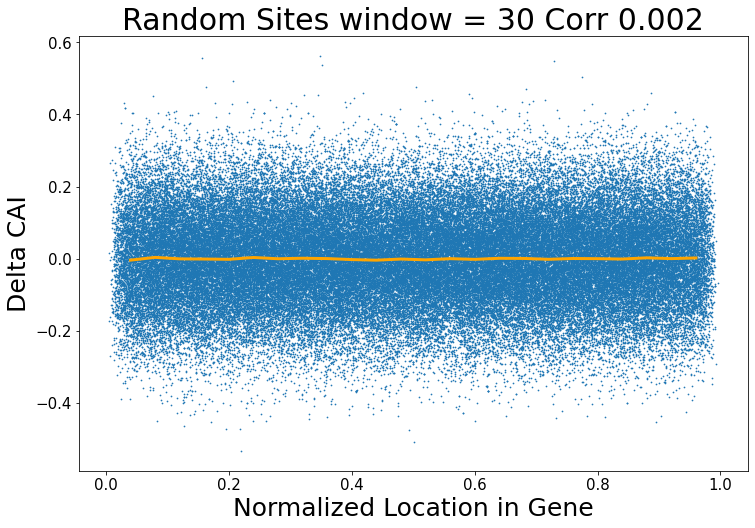

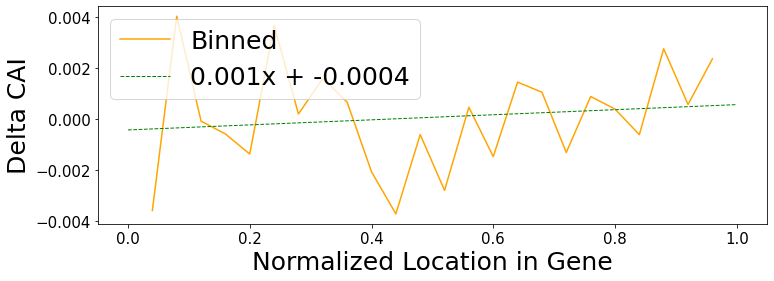

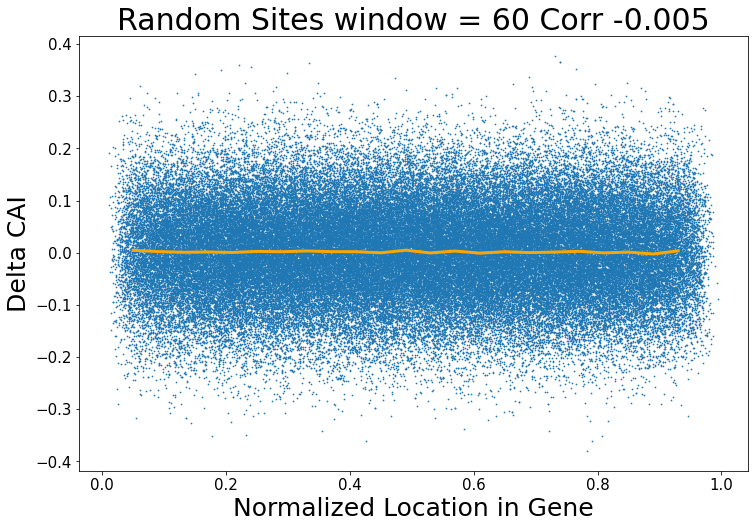

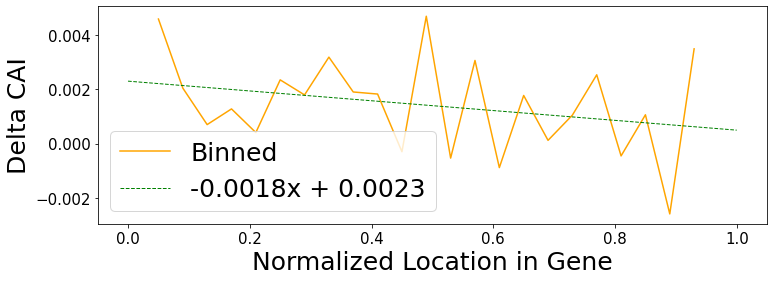

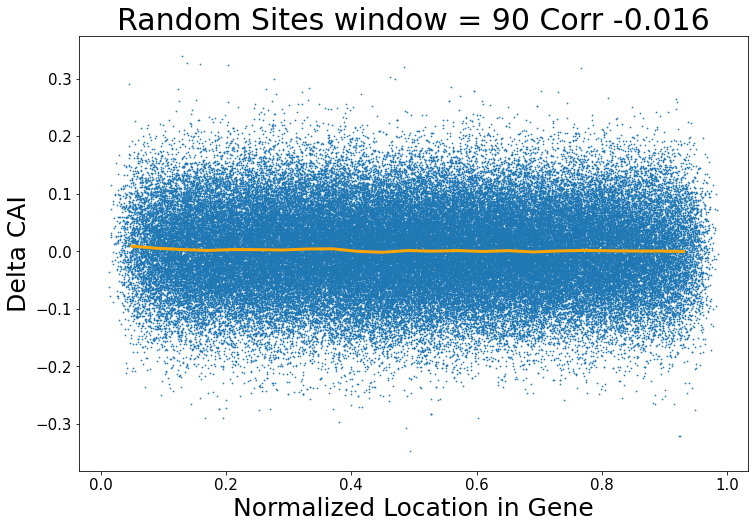

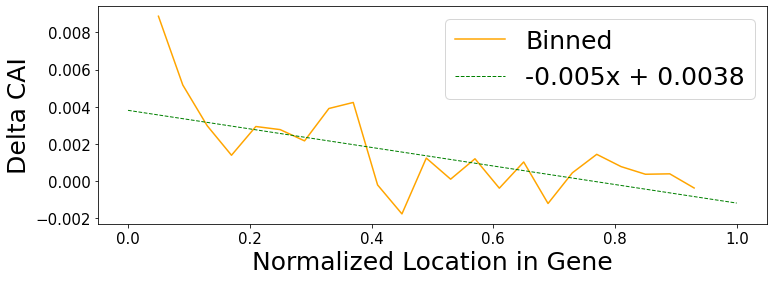

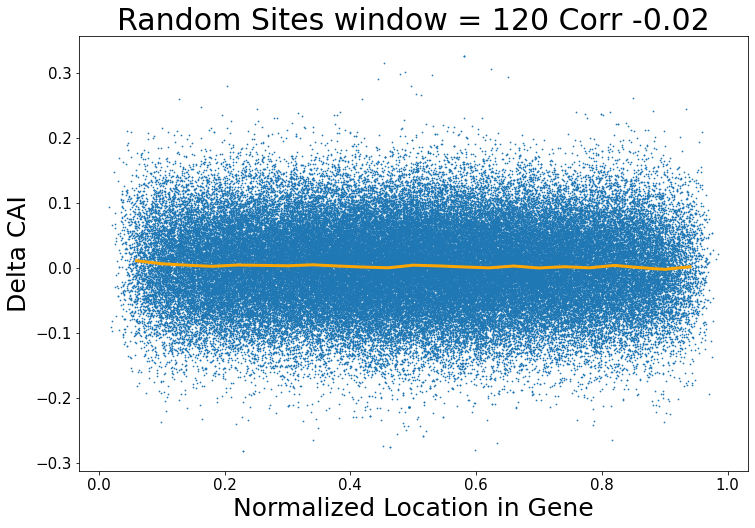

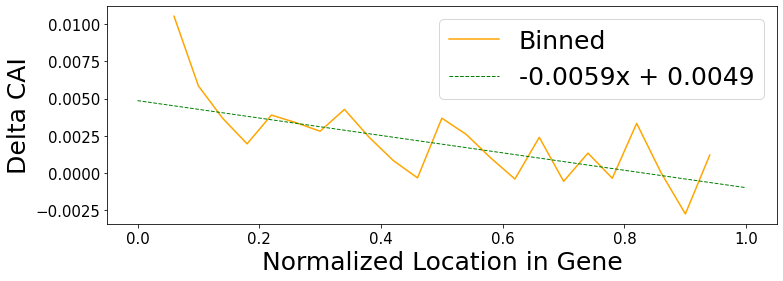

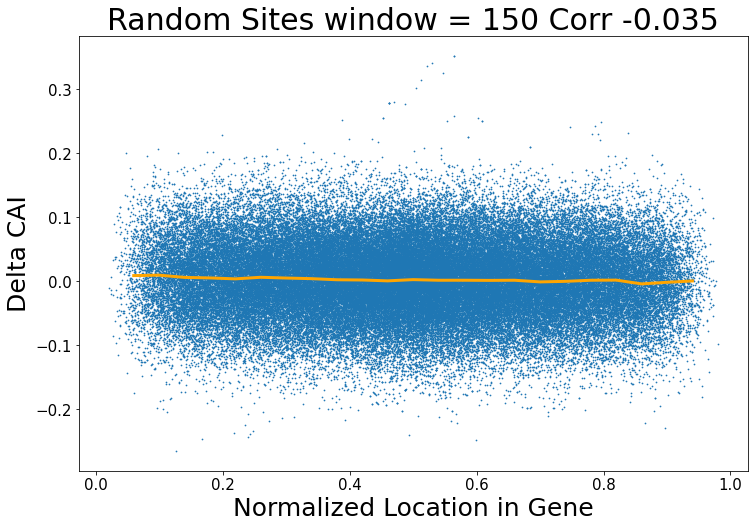

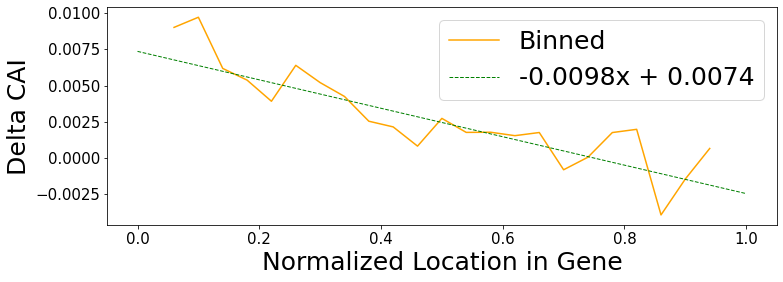

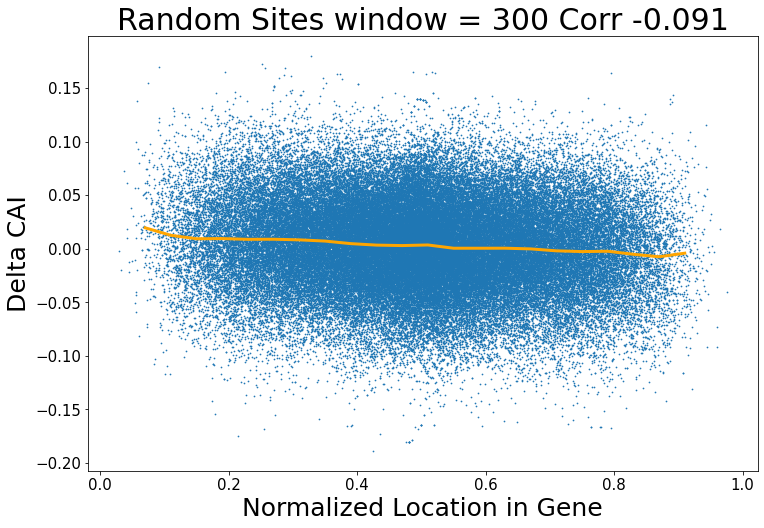

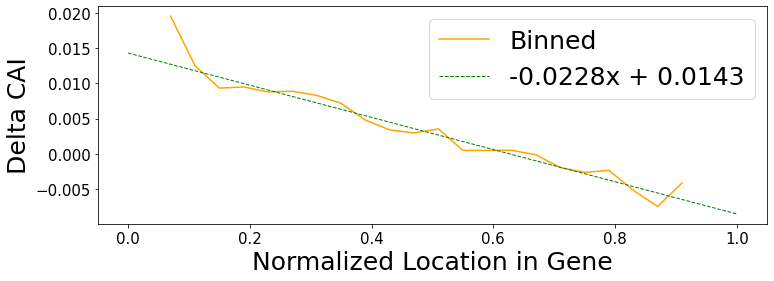

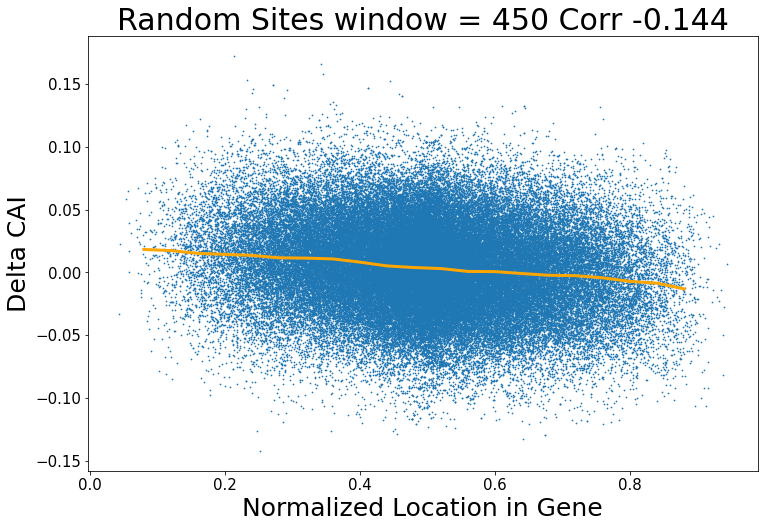

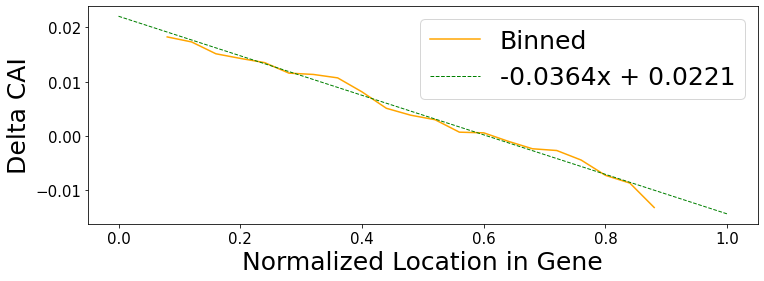

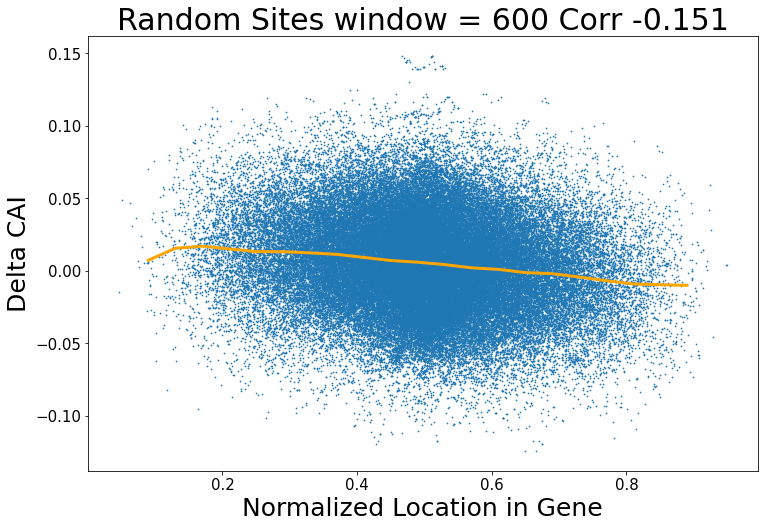

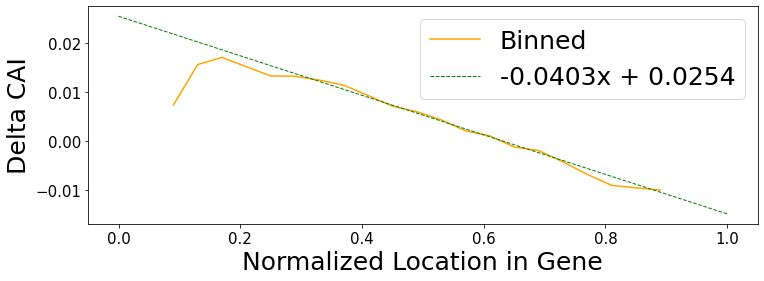

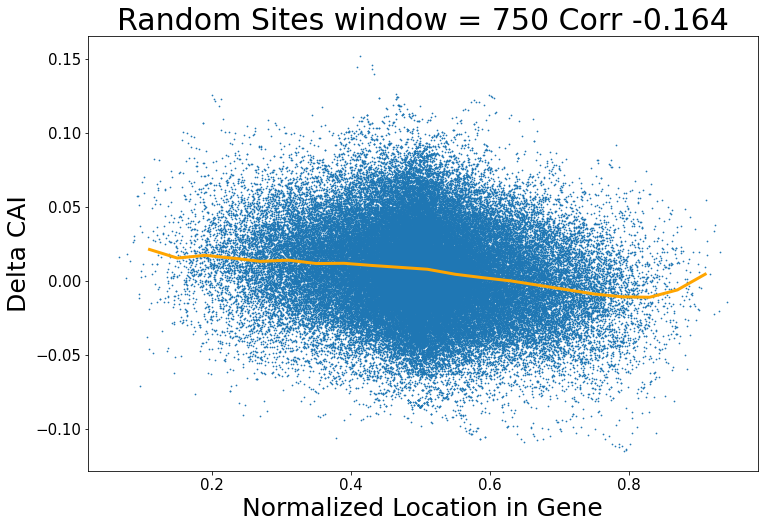

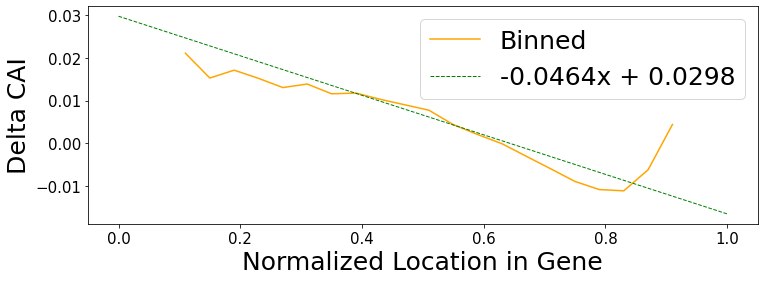

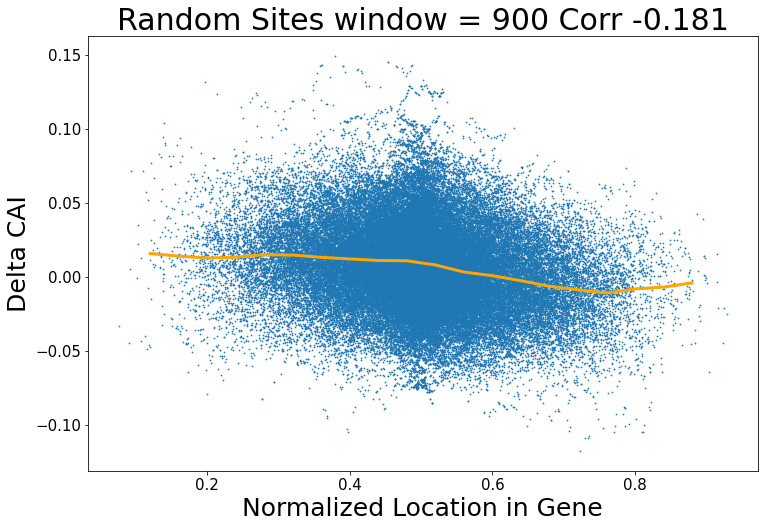

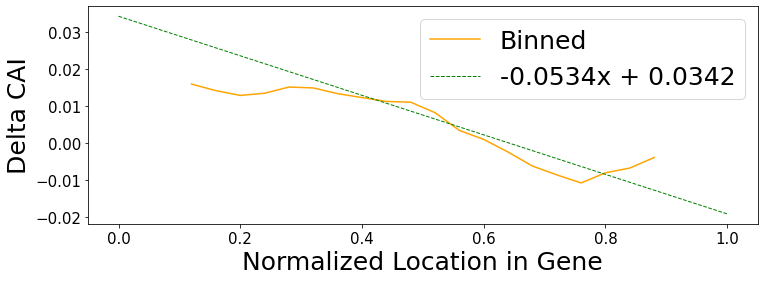

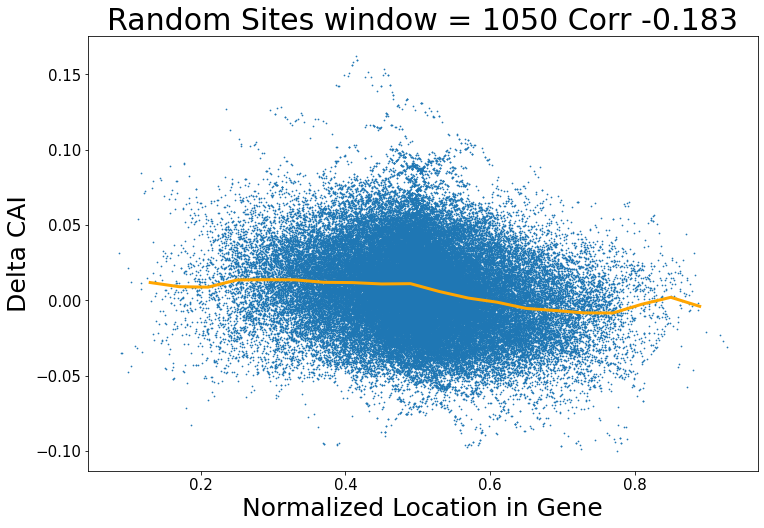

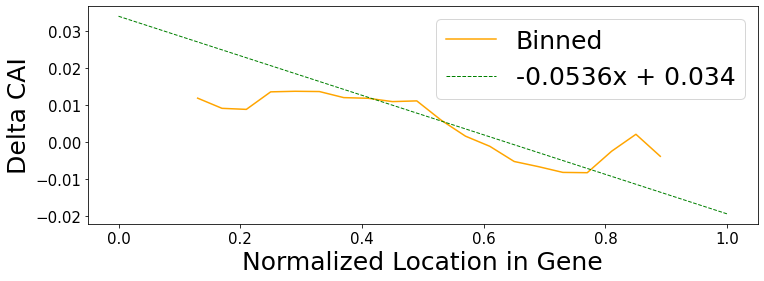

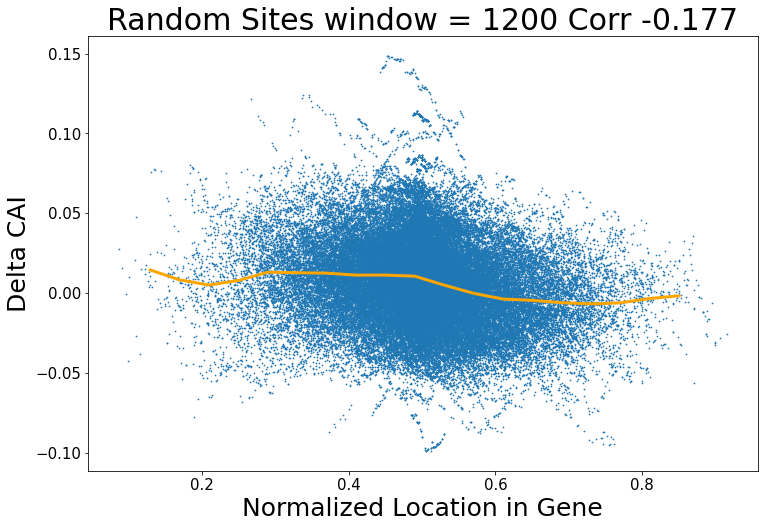

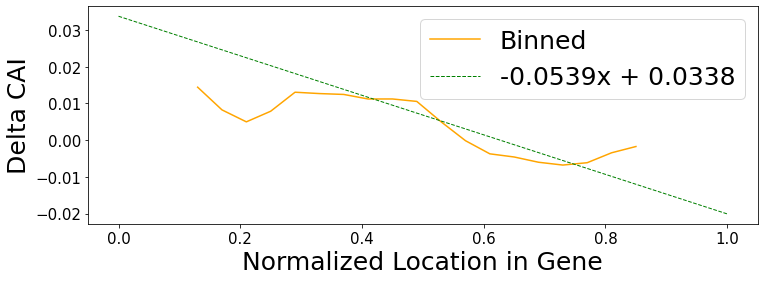

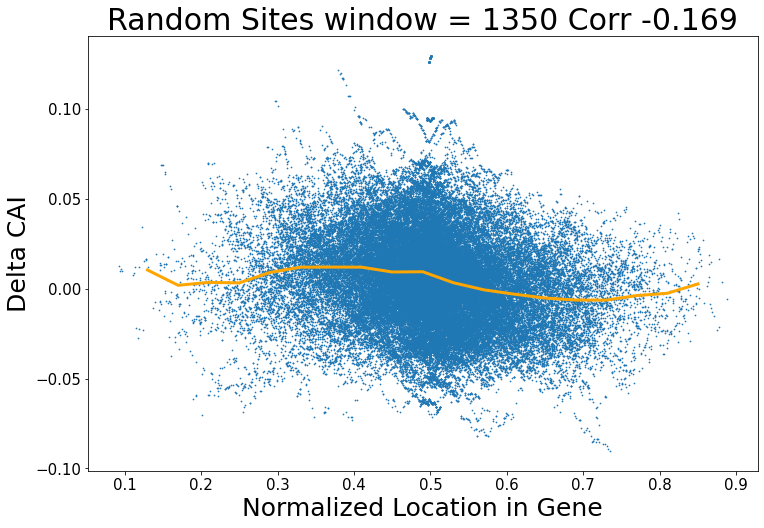

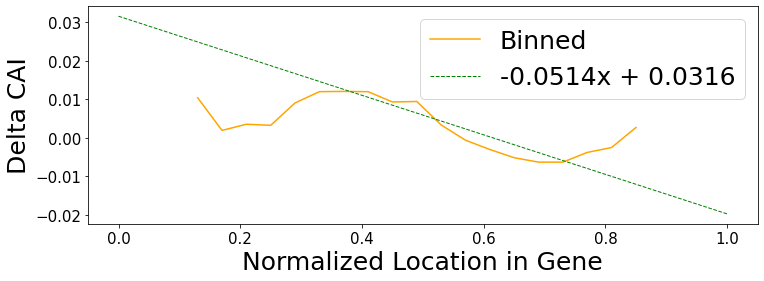

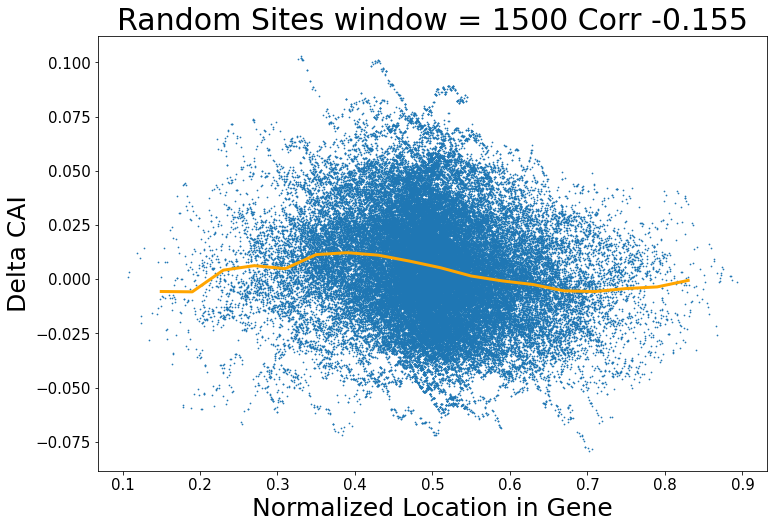

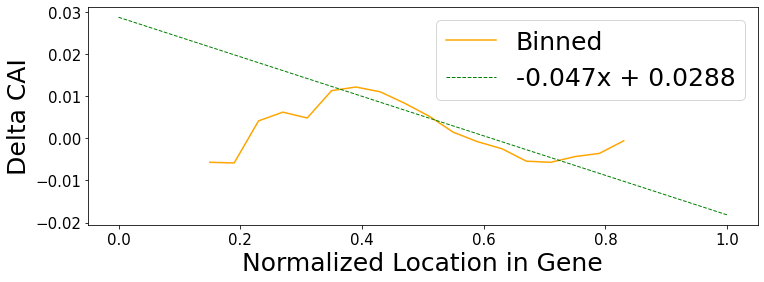

In [27]:
import math


#change the binning to be based off of min and max values to make the extremes cleaner
rand_binned = {}
for w in all_windows:
    file = 'all/all_random_locs_window'+ str(w)+'.tsv'
    
    with open(file, 'r') as f: 
        
        vals = []
        proportion_locs = []
        for line in f:
            if not line.startswith('#'):
                vals.append(float(line.strip().split('\t')[5]))

                s = line.strip().split('\t')
                proportion_locs.append(float(s[1])/ float(s[2]))
        
        
        binned = {}
        i = round(min(proportion_locs) + 0.04 ,2) 
        while i <  max(proportion_locs) - 0.03: 
            
          
            binned[i] = []
            i = round(i + 0.04, 2) 
    
        
        rounded =[] 
        
        for i in range(len(proportion_locs)):
            curLoc = proportion_locs[i]
            
            mini = 5
            closestb = 0 
            for b in binned.keys():
                
                dist = abs(curLoc - b) 
                
                if dist < mini:  
                    mini = dist
                    closestb = b
              
            temp = binned[closestb]
            temp.append(vals[i])
            binned[closestb] = temp
            
            
        
        #ordered = sorted(list(binned.keys())) 
        means = [] 
        stds = [] #hehe 
        for k in binned.keys():
            

            t = binned[k]

            means.append(np.mean(t))
            stds.append(np.std(t))
            
        r = np.corrcoef(proportion_locs, vals)[0][1]
        
        m, b = np.polyfit(proportion_locs, vals, 1)
        test = np.linspace(0,1,100)
        
        rand_binned[w] = [binned.keys(),means]
        
        
        plt.figure(figsize= [12,8]) 
        
        plt.ylabel('Delta CAI')
        plt.xlabel('Normalized Location in Gene' )
        plt.scatter(proportion_locs, vals, s = 0.5)
        plt.plot(binned.keys(), means, color = 'orange', linewidth = 3)
    
          
       
        plt.title('Random Sites window = ' + str(w) + ' Corr ' + str(round(r,3)))
        plt.figure(figsize= [12,4])
        plt.plot(binned.keys(), means, color = 'orange')
        plt.ylabel('Delta CAI')
        plt.xlabel('Normalized Location in Gene' )
        plt.plot(test, m * test + b, color = 'green', linestyle = '--', linewidth = 1)
        plt.legend(['Binned', str(round(m, 4)) + 'x + ' + str(round(b, 4))])
        



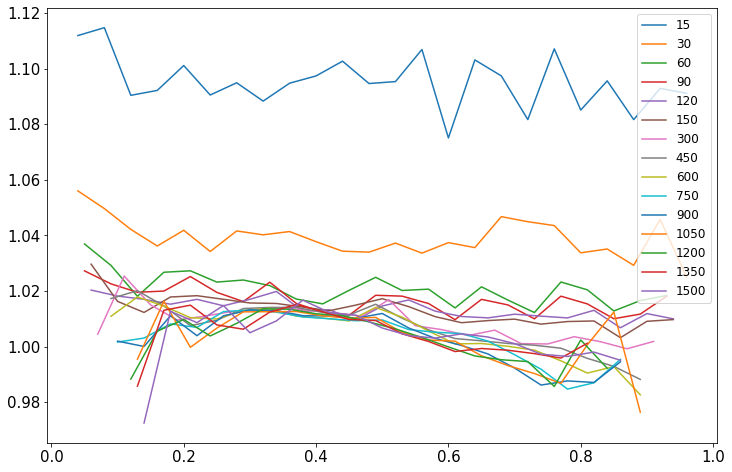

In [15]:
plt.figure(figsize = [12,8])


for x in rand_binned.keys(): 
    cur = rand_binned[x]
    
        
    plt.plot(cur[0], cur[1])
    plt.legend(rand_binned.keys())
 

In [16]:
import numpy as np
import statsmodels.api as sm
import pylab

/var/folders/7f/_vdp3w9j5r9_qyl5mkhz8pn00000gn/T/ipykernel_71757/3684660451.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize= [12,8])


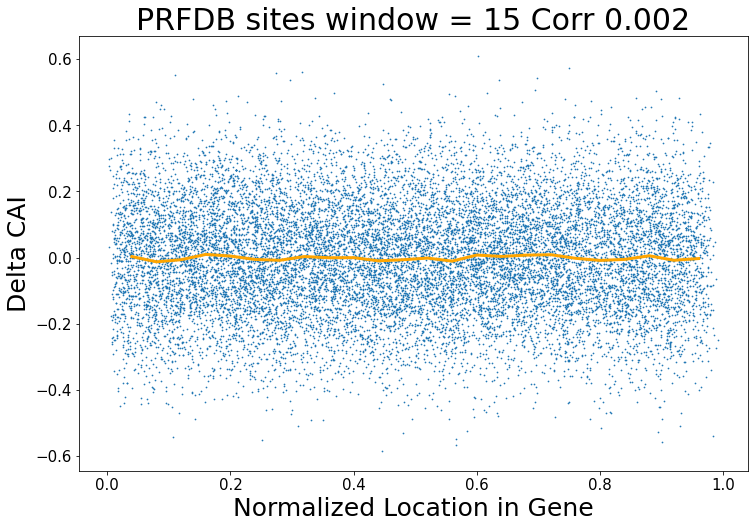

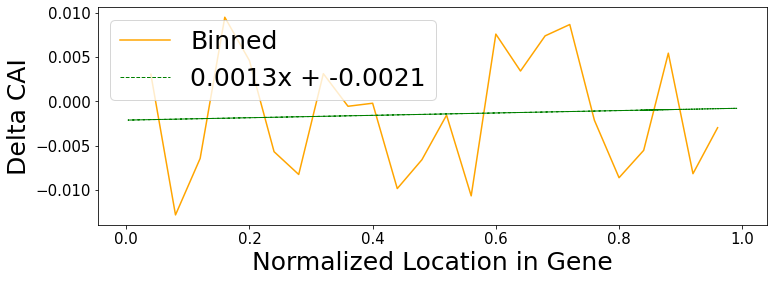

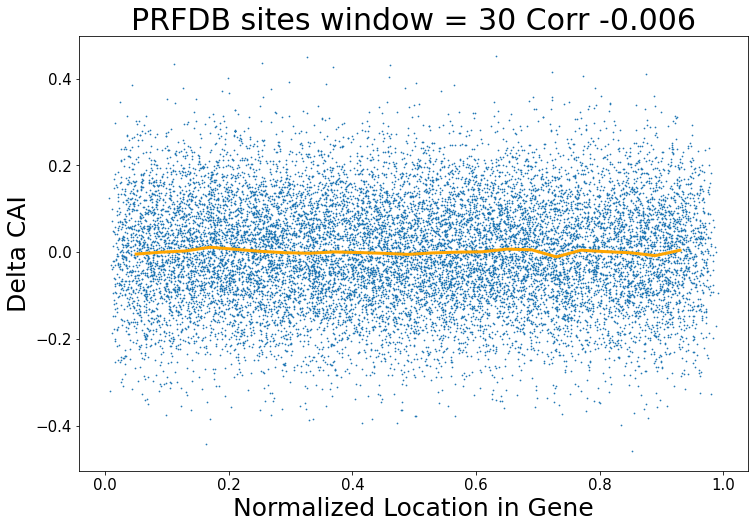

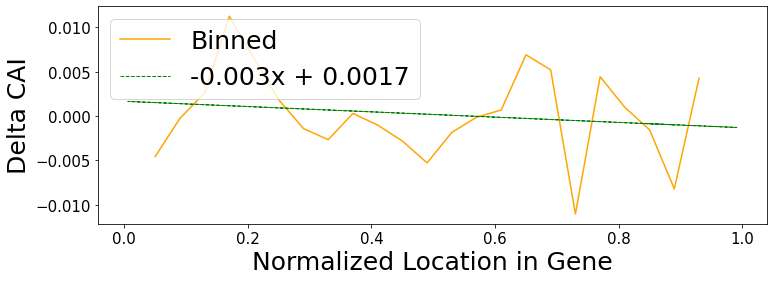

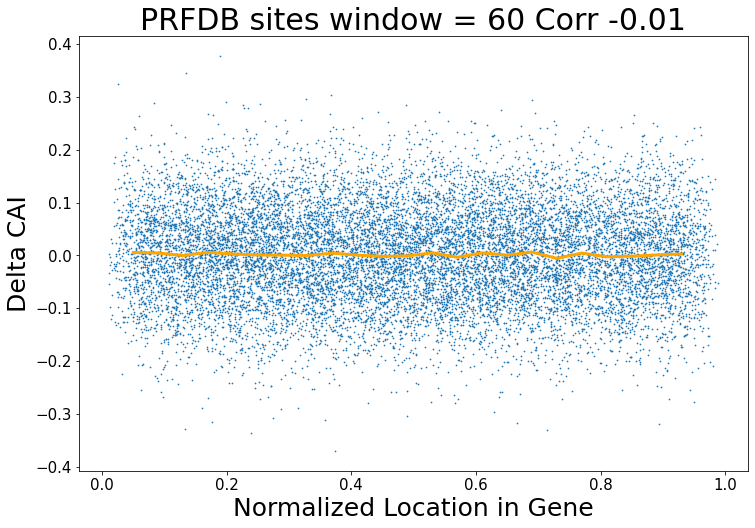

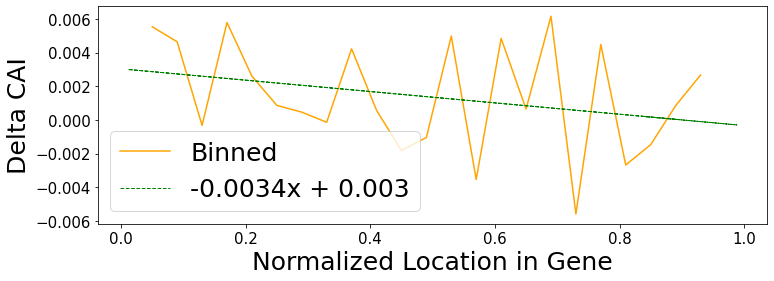

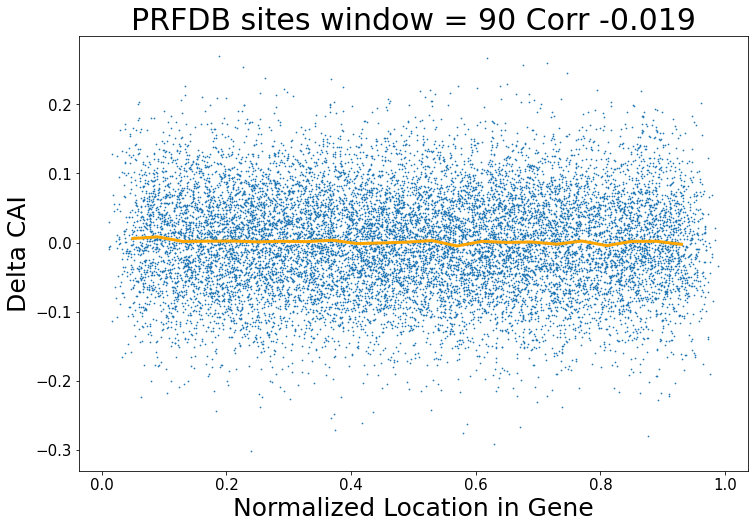

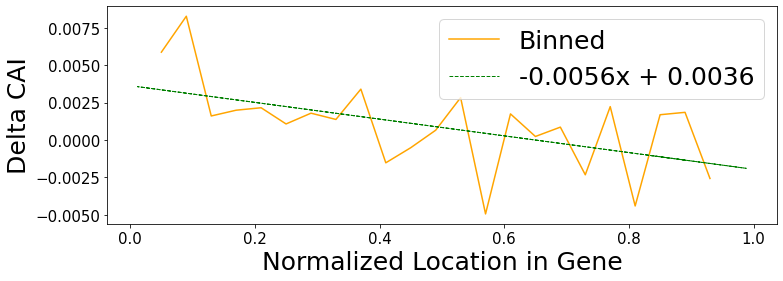

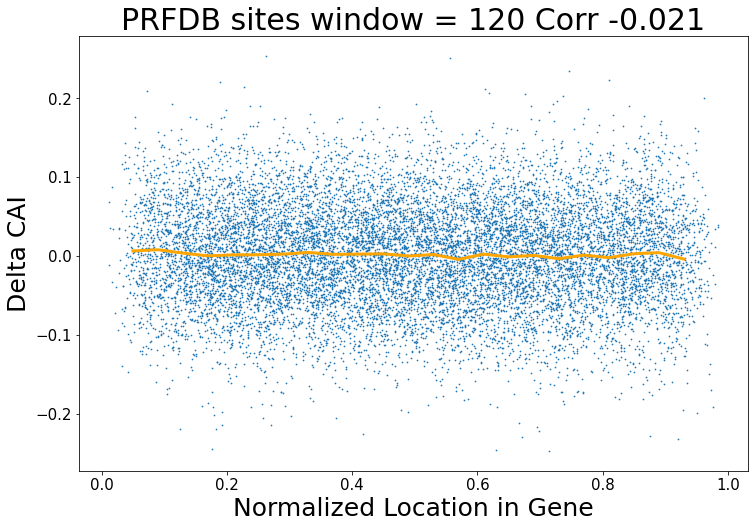

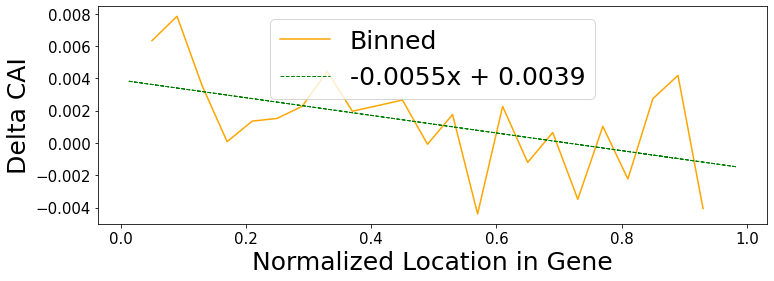

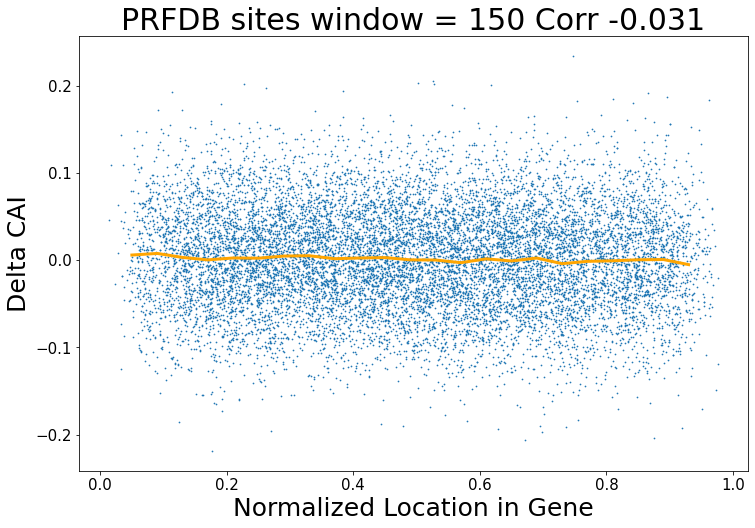

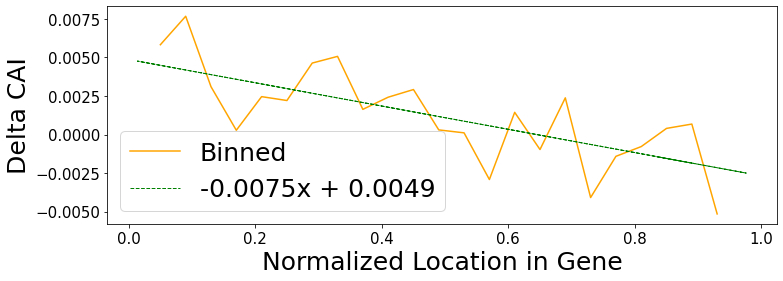

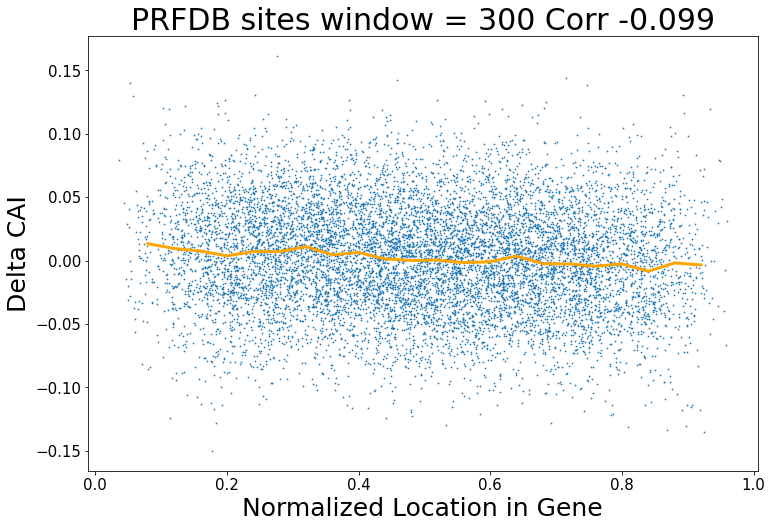

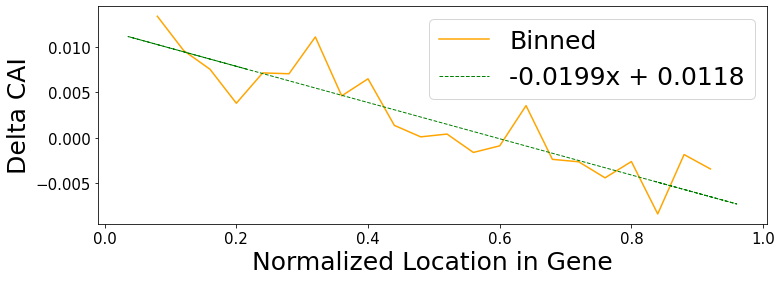

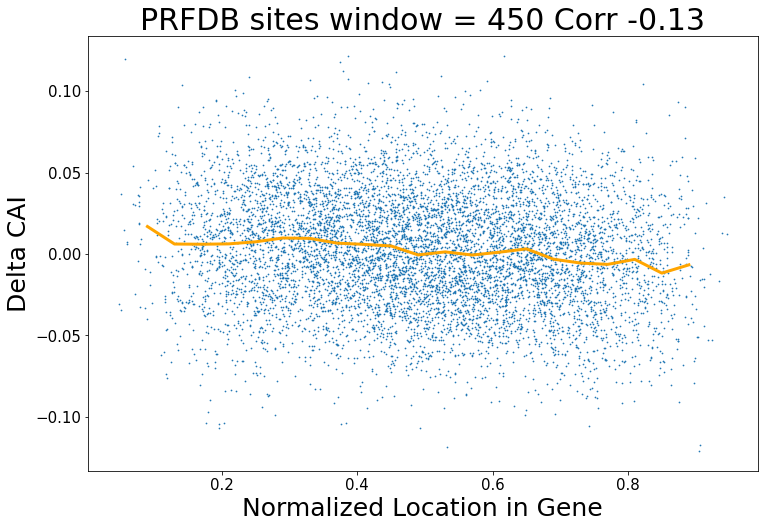

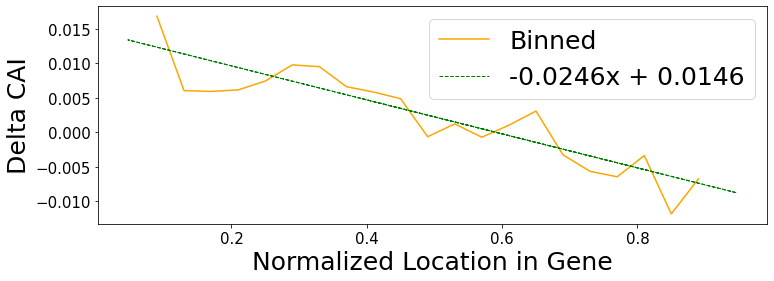

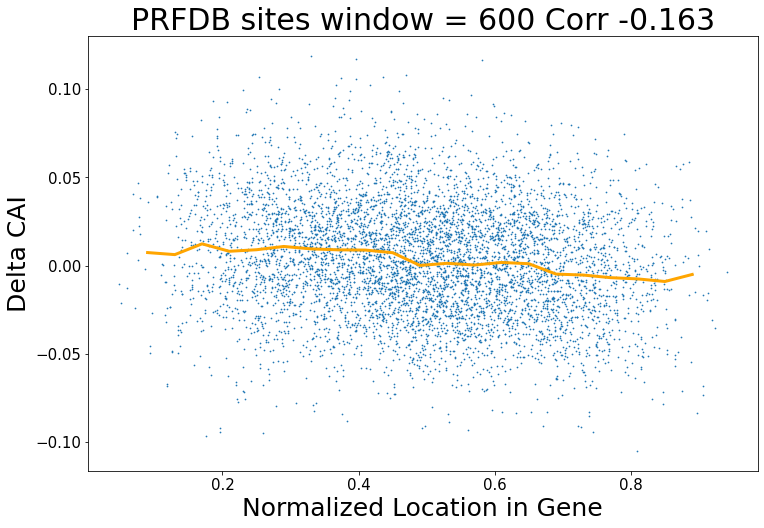

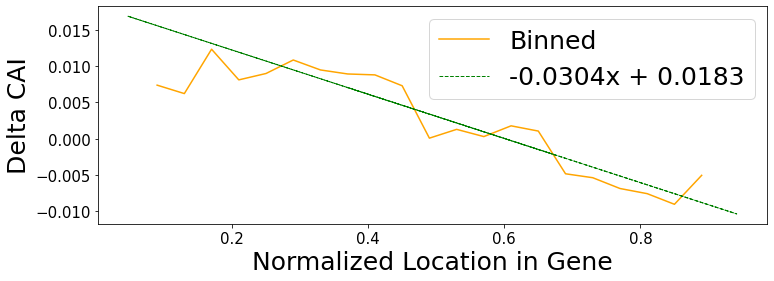

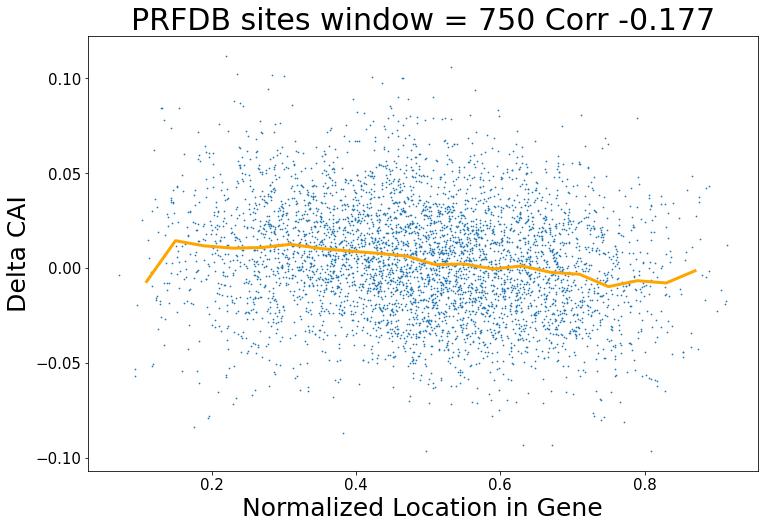

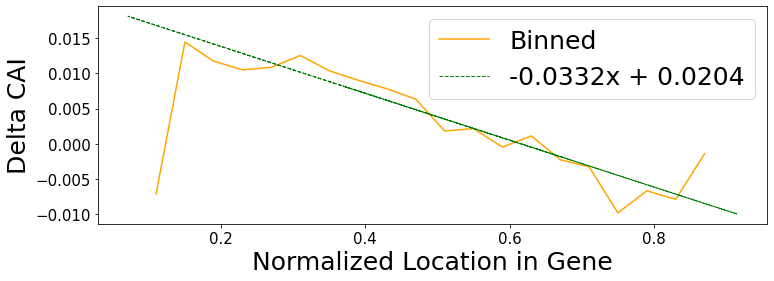

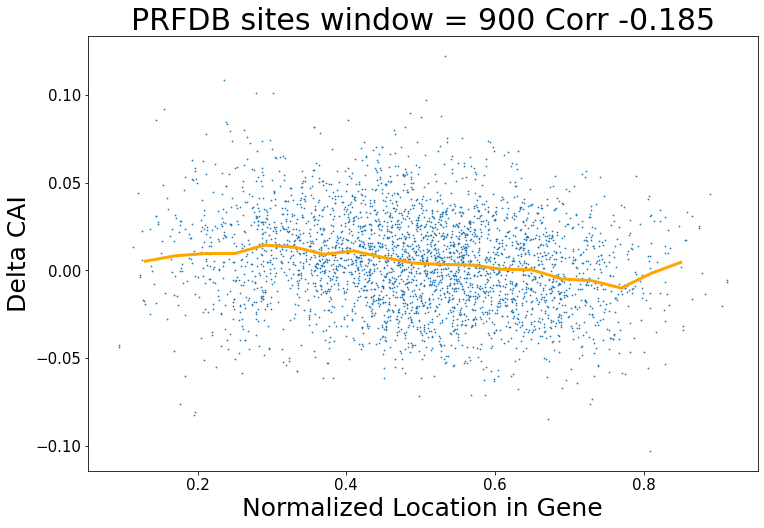

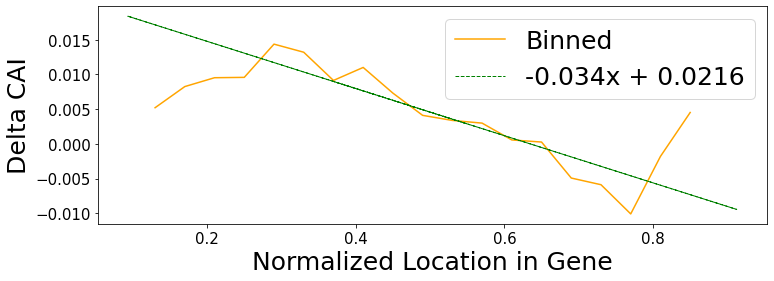

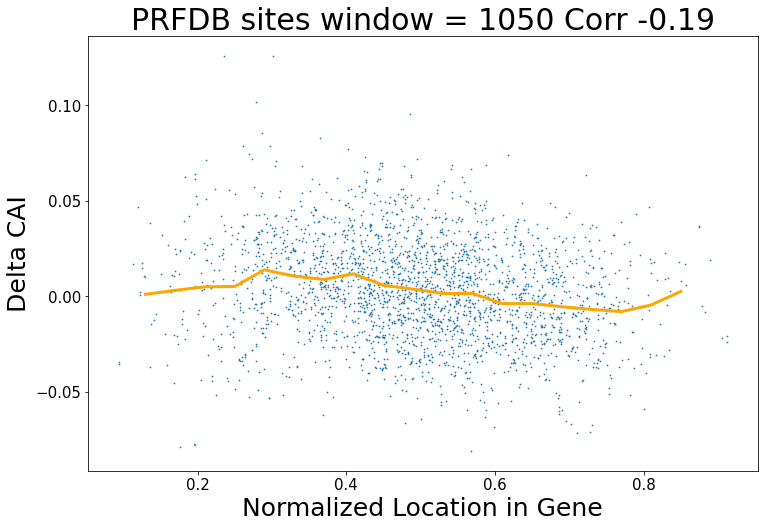

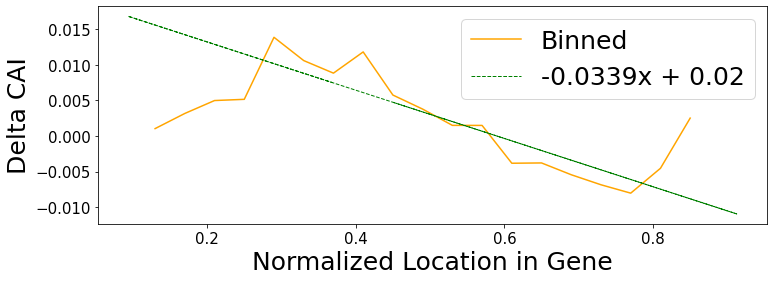

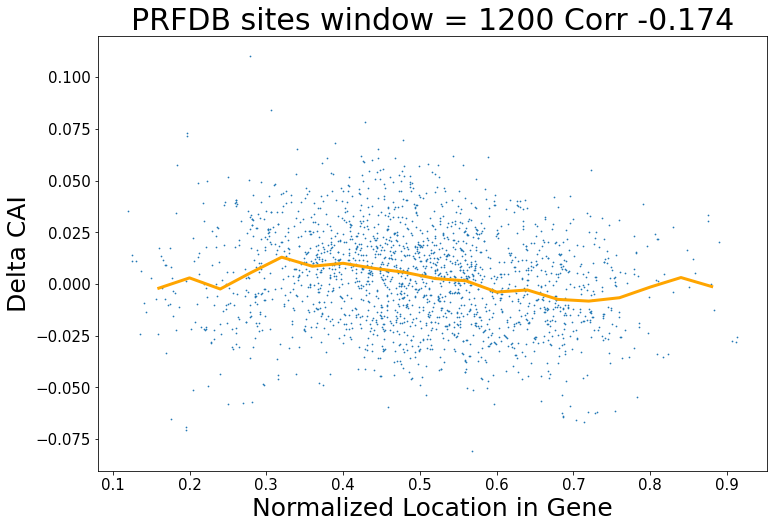

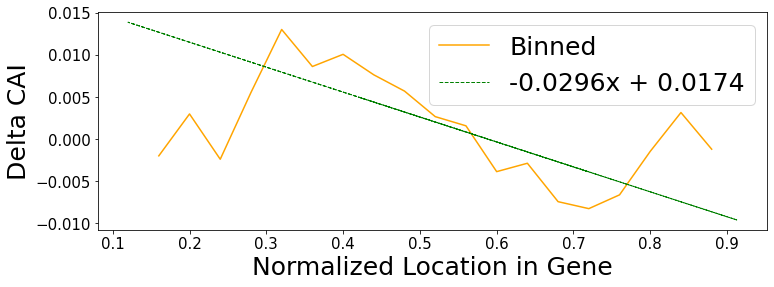

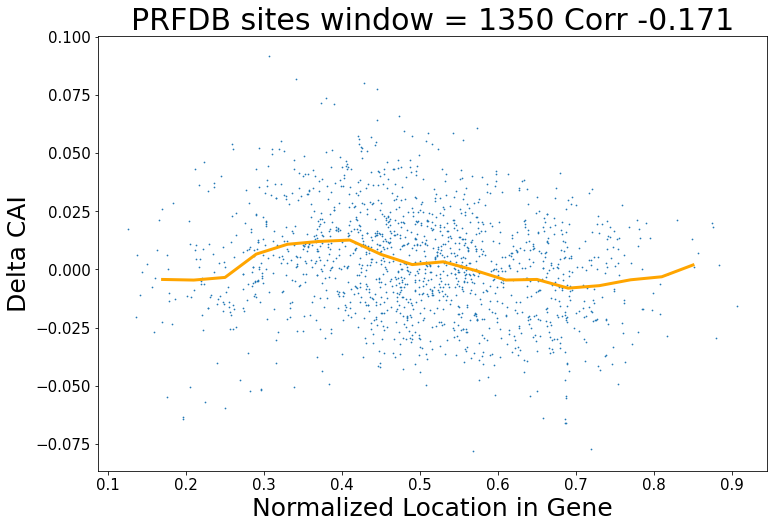

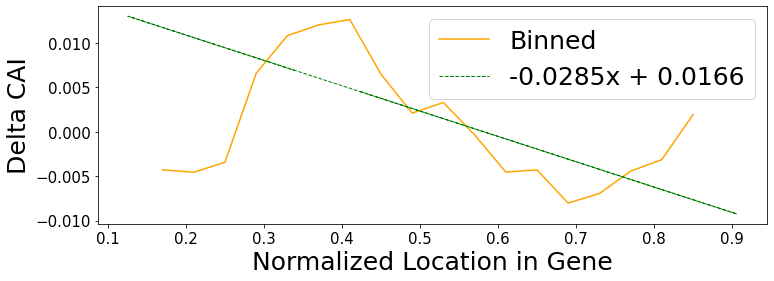

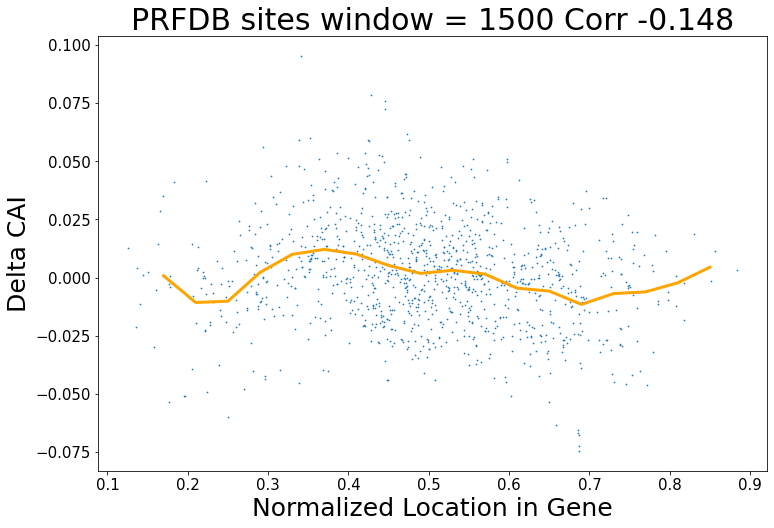

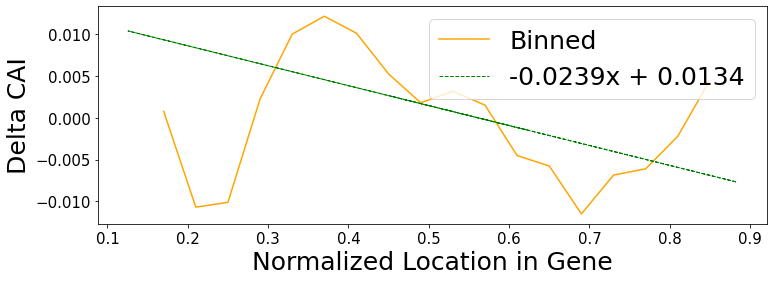

In [29]:

import numpy as np

prf_binned = {}
for w in all_windows:
    file = 'all/all_prfdb_cai_window'+ str(w)+'.tsv'
    with open(file, 'r') as f: 
        vals = []
        proportion_locs = []
        for line in f:
            if not line.startswith('#'):
                vals.append(float(line.strip().split('\t')[5]))

                s = line.strip().split('\t')
                proportion_locs.append(float(s[1])/ float(s[2]))
            
            
            
        
        
        binned = {}
        i = round(min(proportion_locs) + 0.04 ,2) 
        while i <  max(proportion_locs) - 0.03: 
            
          
            binned[i] = []
            i = round(i + 0.04, 2) 
       
        
        rounded =[] 
        
        for i in range(len(proportion_locs)):
            curLoc = proportion_locs[i]
            
            mini = 5
            closestb = 0 
            for b in binned.keys():
                
                dist = abs(curLoc - b) 
                
                if dist < mini:  
                    mini = dist
                    closestb = b
              
            temp = binned[closestb]
            temp.append(vals[i])
            binned[closestb] = temp
            


        r = np.corrcoef(proportion_locs, vals)[0][1]
        
         

        #ordered = sorted(list(binned.keys())) 
        means = [] 
        stds = [] 
        for k in binned.keys():
            

            t = binned[k]
           
            
    
            means.append(np.mean(t))
            stds.append(np.std(t))
     
     
        prf_binned[w] = [binned.keys(),means]
        
        
        m, b = np.polyfit(proportion_locs, vals, 1)
        test = np.linspace(0,1,100)
        plt.figure(figsize= [12,8]) 
      
        plt.ylabel('Delta CAI')
        plt.xlabel('Normalized Location in Gene' )
        plt.scatter(proportion_locs, vals, s = 0.5)
        plt.plot(binned.keys(), means, color = 'orange', linewidth = 3)
        
       
        test = np.array(proportion_locs)
        plt.title('PRFDB sites window = ' + str(w) + ' Corr ' + str(round(r,3)))
        plt.figure(figsize= [12,4]) 
        plt.plot(binned.keys(), means, color = 'orange')
        plt.ylabel('Delta CAI')
        plt.xlabel('Normalized Location in Gene')
        plt.plot(test, m * test + b, color = 'green', linestyle = '--', linewidth = 1)
        plt.legend(['Binned', str(round(m, 4)) + 'x + ' + str(round(b, 4))])
        
        
        
       
        


     
